In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
dataset = pd.read_csv('transaction.csv')
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [4]:
#Dataset -> Country=Germany, year=2011
dataset['year'] = pd.DatetimeIndex(dataset['InvoiceDate']).year
data = dataset.loc[(dataset['Country'] == 'Germany') & (dataset['year'] == 2011)]
data.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country,year
1185,554985,21746,628,5/29/2011 12:26,12426,Germany,2011
1186,554985,21770,981,5/29/2011 12:26,12426,Germany,2011
1187,554985,22329,212,5/29/2011 12:26,12426,Germany,2011
1188,554985,22976,910,5/29/2011 12:26,12426,Germany,2011
1189,554985,22845,668,5/29/2011 12:26,12426,Germany,2011


In [6]:
#Total Quantity group by month
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
total_qty = data.groupby('month').Qty.sum().reset_index()
total_qty

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,Qty
0,1,101266
1,2,37800
2,3,72084
3,4,60993
4,5,103749
5,6,79711
6,7,96423
7,8,120908
8,9,104487
9,10,159490


Text(0, 0.5, 'Quantity')

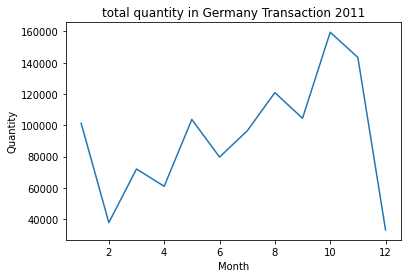

In [7]:
#Visualize the movement of total qty
plt.plot(total_qty['month'], total_qty['Qty'])
plt.title('total quantity in Germany Transaction 2011')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

In [9]:
#Predict total qty in January 2012 with Linear Regression
sum_Y = total_qty['Qty'].sum()
sum_X = total_qty['month'].sum()
pow_X = pow(total_qty['month'],2).sum()
X_pow = pow(total_qty['month'].sum(),2)
sum_XY = (total_qty['month']*total_qty['Qty']).sum()
a = ((sum_Y*pow_X) - (sum_X * sum_XY)) / (((12) * (pow_X)) - (X_pow))
b = ((12) * (sum_XY) - (sum_X) * (sum_Y)) / (((12)*(pow_X)) - (X_pow))
Y = a + (b*13)
print("Total Quantity in January 2012 : ", Y)

Total Quantity in January 2012 :  117751.75757575757


In [13]:
#Calculate the MAE, MSE, MAPE for within 9 months
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

x_test = [10,11,12]
y_act = [159490, 143409, 33126]
y_pred = []
for x in x_test:
  Y_pred = a + (b*x)
  y_pred.append(Y_pred)
  print("Hasil prediksi quantity pada bulan ", x,Y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / (y_true)) *100)

mae = mean_absolute_error(y_act, y_pred)
mse = mean_squared_error(y_act, y_pred)
mape = mean_absolute_percentage_error(y_act, y_pred)
print('Mean Absolute Error : ', mae)
print('Mean Squared Error : ', mse)
print('Mean Absolute Percentage Error', mape)

Hasil prediksi quantity pada bulan  10 106229.6386946387
Hasil prediksi quantity pada bulan  11 110070.344988345
Hasil prediksi quantity pada bulan  12 113911.05128205128
Mean Absolute Error :  55794.68919968919
Mean Squared Error :  3491452171.6691437
Mean Absolute Percentage Error 100.17115400614942
